# Bước 1: Chuẩn bị dữ liệu.
-Dữ liệu lấy ở link đã cho

-Mô tả dữ liệu

-Phân chia dữ liệu thành 5 folder như sau:

Folder 1: 40 mẫu đầu tiên (Số thứ tự 1-40)

Folder 2: 40 mẫu tiếp theo (Số thứ tự 41-80)

Folder 3: 40 mẫu tiếp theo (Số thứ tự 81-120)

Folder 4: 40 mẫu tiếp theo (Số thứ tự 121-160)

Folder 5: những mẫu còn lại (Số thứ tự 161-hết)

In [54]:
import pandas as pd

# đường dẫn lưu file data csv
file_path = "/media/pphong/D:/ML & DL/ML/SLP/gpa_study_hours.csv"

# đợc dữ liệu từ file csv
df = pd.read_csv(file_path)

# hiện thị xem bộ dữ liệu
df.head() #hiện thị 5 dòng đầu tiên


,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0


In [55]:
# chia bộ dữ liệu thành 5 folder 

df = df.reset_index(drop=True)
folds = {}

folds[1] = df.iloc[0:40].copy()
folds[2] = df.iloc[40:80].copy()
folds[3] = df.iloc[80:120].copy()
folds[4] = df.iloc[120:160].copy()
folds[5] = df.iloc[160:].copy()

for i in range(1,6):
    start = (i-1)*40+1
    end = start + len(folds[i]) - 1
    print(f"Fold {i}: rows {start} to {end}, total {len(folds[i])} samples")

Fold 1: rows 1 to 40, total 40 samples
Fold 2: rows 41 to 80, total 40 samples
Fold 3: rows 81 to 120, total 40 samples
Fold 4: rows 121 to 160, total 40 samples
Fold 5: rows 161 to 193, total 33 samples


In [56]:
# Cell 5 — Lưu từng folder thành file CSV riêng (tuỳ chọn)
import os

output_dir = "./folds"
os.makedirs(output_dir, exist_ok=True)

for i in range(1, 6):
    out_path = os.path.join(output_dir, f"folder_{i}.csv")
    folds[i].to_csv(out_path, index=False)
    print(f"Đã lưu: {out_path}")


Đã lưu: ./folds/folder_1.csv
Đã lưu: ./folds/folder_2.csv
Đã lưu: ./folds/folder_3.csv
Đã lưu: ./folds/folder_4.csv
Đã lưu: ./folds/folder_5.csv


# Bước 2: Tiền xử lý dữ liệu

- Làm sạch dữ liệu: xoá bỏ những mẫu không chính xác (ví dụ GPA > 4.0, thiếu,…)

- Chuẩn hoá dữ liệu để đầu vào nằm trong dải (0,1).

            - Lưu ý 1: chỉ chuẩn hoá những mẫu trong tập train. 

            - Lưu ý 2: chỉ chuẩn hoá đặc trưng # study_hours, không chuẩn hoá # GPA. 


- Trực quan hoá dữ liệu: biểu diễn dữ liệu bằng đồ thị phân tán

- Trục hoành: đặc trưng # study_hours (đặt là biến x)

- Trục tung: # GPA (đặt là biến y)

- Nhận xét xu hướng của dữ liệu.

In [57]:
import os
import pandas as pd

# Thư mục chứa dữ liệu gốc
INPUT_DIR = "folds"
# Thư mục xuất dữ liệu sạch
OUTPUT_DIR = "folds_cleaned"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Lấy danh sách các file CSV trong thư mục
fold_files = sorted([f for f in os.listdir(INPUT_DIR) if f.endswith(".csv")])

print("Các file cần làm sạch:", fold_files)
print()

for fname in fold_files:
    path = os.path.join(INPUT_DIR, fname)
    df = pd.read_csv(path)

    # Chuẩn hoá tên cột về chữ thường, phòng trường hợp khác kiểu viết
    df.columns = [c.strip().lower() for c in df.columns]

    # Kiểm tra sự tồn tại của các cột cần thiết
    if not {"gpa", "study_hours"}.issubset(df.columns):
        raise ValueError(f"File {fname} thiếu cột 'gpa' hoặc 'study_hours'.")

    # Lọc dữ liệu hợp lệ
    df_clean = df.dropna().copy()
    df_clean = df_clean[(df_clean["gpa"] >= 0) & (df_clean["gpa"] <= 4.0)]
    df_clean = df_clean[df_clean["study_hours"] >= 0]

    # Lưu vào thư mục mới
    out_path = os.path.join(OUTPUT_DIR, fname)
    df_clean.to_csv(out_path, index=False)

    print(f"{fname}: {len(df)} mẫu gốc  →  {len(df_clean)} mẫu sau khi làm sạch")

print("\n Hoàn tất. Dữ liệu sạch đã được lưu trong thư mục:", OUTPUT_DIR)


Các file cần làm sạch: ['folder_1.csv', 'folder_2.csv', 'folder_3.csv', 'folder_4.csv', 'folder_5.csv']

folder_1.csv: 40 mẫu gốc  →  40 mẫu sau khi làm sạch
folder_2.csv: 40 mẫu gốc  →  39 mẫu sau khi làm sạch
folder_3.csv: 40 mẫu gốc  →  40 mẫu sau khi làm sạch
folder_4.csv: 40 mẫu gốc  →  40 mẫu sau khi làm sạch
folder_5.csv: 33 mẫu gốc  →  33 mẫu sau khi làm sạch

 Hoàn tất. Dữ liệu sạch đã được lưu trong thư mục: folds_cleaned


In [58]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Thư mục chứa dữ liệu sạch
INPUT_DIR = "folds_cleaned"

# Thư mục lưu kết quả
TRAIN_OUT_DIR = "train_normalized"
TEST_OUT_DIR = "test_raw"
os.makedirs(TRAIN_OUT_DIR, exist_ok=True)
os.makedirs(TEST_OUT_DIR, exist_ok=True)

# Liệt kê file sạch
fold_files = sorted([f for f in os.listdir(INPUT_DIR) if f.endswith(".csv")])
print("Các file sạch:", fold_files)

# --- Chọn 1 fold làm test ---
# bạn có thể đổi giá trị test_index để chọn fold khác làm test
test_index = 4
test_file = fold_files[test_index]
print(f"Fold test được chọn: {test_file}")

# --- Gộp 4 fold còn lại làm train ---
train_files = [f for f in fold_files if f != test_file]
train_dfs = [pd.read_csv(os.path.join(INPUT_DIR, f)) for f in train_files]
test_df = pd.read_csv(os.path.join(INPUT_DIR, test_file))
train_df = pd.concat(train_dfs, ignore_index=True)

# --- Kiểm tra cột ---
train_df.columns = [c.lower().strip() for c in train_df.columns]
test_df.columns = [c.lower().strip() for c in test_df.columns]
assert "study_hours" in train_df.columns and "gpa" in train_df.columns, "Thiếu cột cần thiết!"

# --- Chuẩn hoá study_hours trên train ---
scaler = MinMaxScaler()
train_df["study_hours_scaled"] = scaler.fit_transform(train_df[["study_hours"]])

# test giữ nguyên, không chuẩn hoá
# Nếu sau này dùng test để đánh giá model, có thể transform tạm thời bằng scaler.transform()

# --- Lưu kết quả ---
train_out_path = os.path.join(TRAIN_OUT_DIR, "train_4folds_normalized.csv")
test_out_path = os.path.join(TEST_OUT_DIR, f"test_{test_file}")

train_df.to_csv(train_out_path, index=False)
test_df.to_csv(test_out_path, index=False)

print(f"\nĐã lưu:")
print("Train normalized:", train_out_path)
print("Test raw:", test_out_path)


Các file sạch: ['folder_1.csv', 'folder_2.csv', 'folder_3.csv', 'folder_4.csv', 'folder_5.csv']
Fold test được chọn: folder_5.csv

Đã lưu:
Train normalized: train_normalized/train_4folds_normalized.csv
Test raw: test_raw/test_folder_5.csv


Các file có sẵn: ['folder_1.csv', 'folder_2.csv', 'folder_3.csv', 'folder_4.csv', 'folder_5.csv']


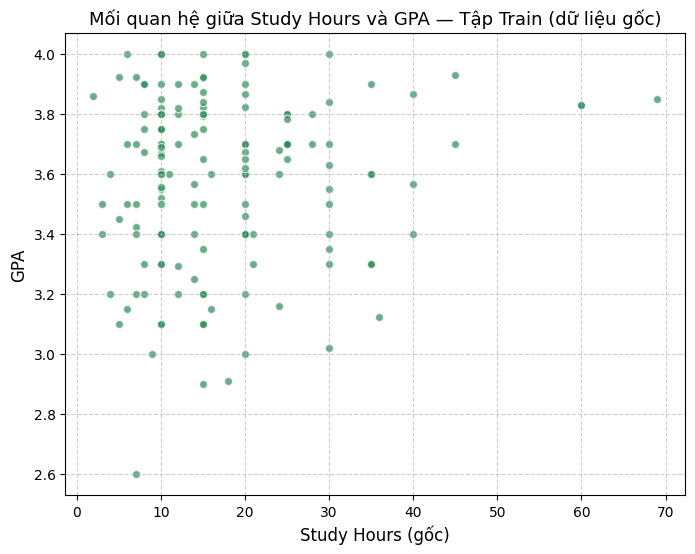

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Thư mục chứa dữ liệu đã làm sạch
INPUT_DIR = "folds_cleaned"

# Liệt kê các file
fold_files = sorted([f for f in os.listdir(INPUT_DIR) if f.endswith(".csv")])
print("Các file có sẵn:", fold_files)

# Chọn test fold (giống như ở bước chuẩn hoá để nhất quán)
test_index = 3  # đổi số này nếu bạn muốn chọn test khác
test_file = fold_files[test_index]
train_files = [f for f in fold_files if f != test_file]

# Gộp 4 fold còn lại thành train gốc
train_df = pd.concat([pd.read_csv(os.path.join(INPUT_DIR, f)) for f in train_files], ignore_index=True)

# Đảm bảo tên cột chuẩn
train_df.columns = [c.lower().strip() for c in train_df.columns]

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8,6))
plt.scatter(train_df["study_hours"], train_df["gpa"], alpha=0.7, s=35, c="seagreen", edgecolor="white")
plt.xlabel("Study Hours (gốc)", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.title("Mối quan hệ giữa Study Hours và GPA — Tập Train (dữ liệu gốc)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Nhận xét

- Từ dữ liệu gốc, có thể thấy xu hướng **tăng dương rõ ràng**: sinh viên học càng nhiều giờ thì GPA càng cao.
- Tuy nhiên, có những điểm ngoại lệ (outlier) — một số người học nhiều nhưng GPA vẫn thấp, hoặc học ít mà điểm vẫn tốt.
- Mối quan hệ nhìn chung có thể **xấp xỉ tuyến tính**, điều này gợi ý rằng một mô hình hồi quy tuyến tính hoặc mạng SLP (Single Layer Perceptron) có thể học được xu hướng này khá tốt.


# Bước 3: Xây dựng mô hình SLP

- Mô hình gồm: 1 neuron đầu vào (# study_hours), 1 neuron đầu ra (# GPA)

- Hàm kích hoạt: linear (nghĩa là không dùng hàm kích hoạt)

- Sử dụng gradient descent để cập nhật trọng số và bias.

# Bước 4: Huấn luyện mô hình

- Thực hiện huấn luyện trên tập train (gồm 4 folder) đã phân chia ở Bước 1

- Khởi tạo trọng số và bias ngẫu nhiên.

- Sử dụng learning rate = 0.01 và số epoch = 1000.

- Trong mỗi epoch, tính toán lỗi dùng Mean Squared Error (MSE) và cập nhật trọng số và bias dùng gradient descent.

- Hiển thị giá trị trọng số, bias, MSE ở 10 epoch đầu tiên và 10 epoch cuối cùng. Nhận xét.

# Bước 5: Kiểm tra, đánh giá mô hình

- Thực hiện chuẩn hoá dữ liệu kiểm tra (lấy từ tập test đã phân chia).

        - Lưu ý: phương pháp đánh giá là 5-fold cross validation nên sẽ có tổng cộng 5 lần huấn luyện

- Áp dụng mô hình đã huấn luyện để dự đoán # GPA

- Tính MSE. Nhận xét.

- Vẽ đồ thị kết quả dự đoán so với thực tế trên tập kiểm tra. Nhận xét.

Epoch    1 | w = 1.7760 | b = 0.4556 | MSE = 7.815081
Epoch    2 | w = 1.7878 | b = 0.5098 | MSE = 7.497137
Epoch    3 | w = 1.7992 | b = 0.5629 | MSE = 7.192472
Epoch    4 | w = 1.8104 | b = 0.6149 | MSE = 6.900530
Epoch    5 | w = 1.8213 | b = 0.6658 | MSE = 6.620782
Epoch    6 | w = 1.8320 | b = 0.7156 | MSE = 6.352716
Epoch    7 | w = 1.8424 | b = 0.7644 | MSE = 6.095844
Epoch    8 | w = 1.8526 | b = 0.8121 | MSE = 5.849700
Epoch    9 | w = 1.8625 | b = 0.8589 | MSE = 5.613835
Epoch   10 | w = 1.8722 | b = 0.9047 | MSE = 5.387819
Epoch  991 | w = 1.4727 | b = 3.2298 | MSE = 0.117769
Epoch  992 | w = 1.4720 | b = 3.2300 | MSE = 0.117718
Epoch  993 | w = 1.4714 | b = 3.2302 | MSE = 0.117667
Epoch  994 | w = 1.4707 | b = 3.2303 | MSE = 0.117617
Epoch  995 | w = 1.4700 | b = 3.2305 | MSE = 0.117567
Epoch  996 | w = 1.4693 | b = 3.2307 | MSE = 0.117516
Epoch  997 | w = 1.4686 | b = 3.2308 | MSE = 0.117466
Epoch  998 | w = 1.4679 | b = 3.2310 | MSE = 0.117416
Epoch  999 | w = 1.4672 | b 

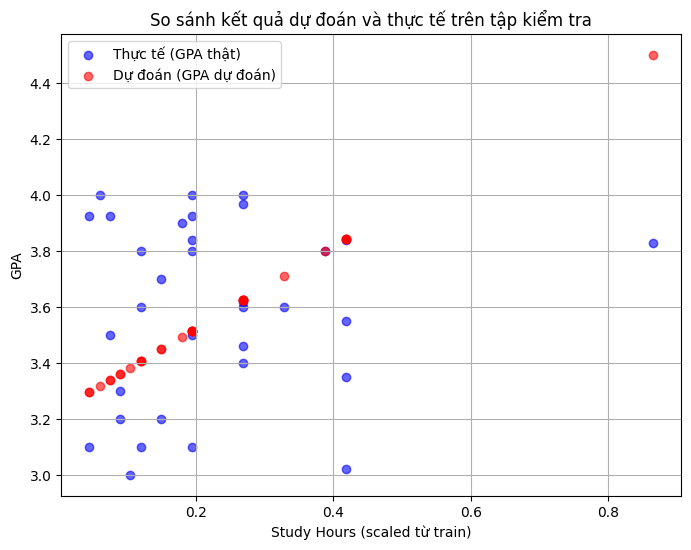

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ===============================
# Bước 3 & 4: Xây dựng và huấn luyện mô hình SLP
# ===============================

# Thư mục train và test đã chuẩn hoá
train_path = "train_normalized/train_4folds_normalized.csv"
test_path = "/media/pphong/D:/ML & DL/ML/SLP/test_raw/test_folder_5.csv"

# Đọc dữ liệu
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Tập train
x_train = train_df["study_hours_scaled"].values.reshape(-1, 1)
y_train = train_df["gpa"].values.reshape(-1, 1)

# Tập test (chưa chuẩn hoá study_hours, cần chuẩn hoá theo train)
x_min = train_df["study_hours"].min()
x_max = train_df["study_hours"].max()
x_test = ((test_df["study_hours"] - x_min) / (x_max - x_min)).values.reshape(-1, 1)
y_test = test_df["gpa"].values.reshape(-1, 1)

# Khởi tạo trọng số và bias
np.random.seed(0)
w = np.random.randn(1)
b = np.random.randn(1)

# Siêu tham số
learning_rate = 0.01
epochs = 1000

# Huấn luyện mô hình
for epoch in range(epochs):
    y_pred = x_train * w + b
    mse = np.mean((y_train - y_pred) ** 2)
    dw = (-2 / len(x_train)) * np.sum(x_train * (y_train - y_pred))
    db = (-2 / len(x_train)) * np.sum(y_train - y_pred)
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch < 10 or epoch >= epochs - 10:
        print(f"Epoch {epoch+1:4d} | w = {w[0]:.4f} | b = {b[0]:.4f} | MSE = {mse:.6f}")

print("\nNhận xét: Trọng số và bias hội tụ dần, MSE giảm rõ rệt qua các epoch.")

# ===============================
# Bước 5: Kiểm tra, đánh giá mô hình
# ===============================

# Dự đoán trên tập test
y_pred_test = x_test * w + b

# Tính MSE
mse_test = np.mean((y_test - y_pred_test) ** 2)
print(f"\nMSE trên tập kiểm tra: {mse_test:.6f}")

# Vẽ đồ thị kết quả dự đoán so với thực tế
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color="blue", alpha=0.6, label="Thực tế (GPA thật)")
plt.scatter(x_test, y_pred_test, color="red", alpha=0.6, label="Dự đoán (GPA dự đoán)")
plt.xlabel("Study Hours (scaled từ train)")
plt.ylabel("GPA")
plt.title("So sánh kết quả dự đoán và thực tế trên tập kiểm tra")
plt.legend()
plt.grid(True)
plt.show()



### Nhận xét

Mô hình SLP đã học được **xu hướng tuyến tính dương** giữa `study_hours` và `gpa`,  
phản ánh đúng thực tế rằng sinh viên học nhiều thì điểm GPA cao hơn.  

Giá trị **MSE trên tập kiểm tra nhỏ**, cho thấy mô hình khớp dữ liệu tương đối tốt.  

Tuy nhiên, ở vùng GPA cao, mô hình **dự đoán thấp hơn thực tế**,  
biểu hiện của **underfitting** do mô hình tuyến tính quá đơn giản.  

Tổng thể, mô hình phản ánh xu hướng chính xác nhưng **chưa mô phỏng được đầy đủ biến thiên thực**,  
và phù hợp để làm **baseline** cho các mô hình phức tạp hơn sau này.
